# Principles of AI (ISB46703)
## Communication and Perception: Natural Language Processing
In this tutorial, we will look into the following:



1.   Text Analytics and NLP
2.   Compare Text Analytics, NLP and Text Mining

*   Text Analysis Operations using NLTK
*   Tokenization
*   Stopwords
*   Lexicon Normalization such as Stemming and Lemmatization
*   POS Tagging

3.   Sentiment Analysis
4.   Text Classification
5.   Performing Sentiment Analysis using Text Classification





## NLTK
NLTK is a powerful Python package that provides a set of diverse natural languages algorithms for tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition.

Read more about NLTK [here](https://www.nltk.org)

In [1]:
# Install the package using conda
!conda install nltk

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/faiz/opt/anaconda3/envs/work

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.5.7           |   py39hecd8cb5_0         153 KB
    nltk-3.7                   |     pyhd3eb1b0_0        1010 KB
    regex-2022.7.9             |   py39hca72f7f_0         313 KB
    tqdm-4.65.0                |   py39h01d92e1_0         134 KB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  nl

In [2]:
# ...and load the package
import nltk

# download several other text processing tools/dataset
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/faiz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/faiz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/faiz/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/faiz/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /Users/faiz/nltk_data...


True

### Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Sentence tokenization
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_sent=sent_tokenize(text)
print("Sentences: ", tokenized_sent)

#  Word tokenization
tokenized_word=word_tokenize(text)
print("Words: ", tokenized_word)


In [ ]:
from nltk.probability import FreqDist

# Frequency Distribution
fdist = FreqDist(tokenized_word)
print(fdist)

In [ ]:
fdist.most_common(2)

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

###Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, we need to create a list of stopwords and filter out list of tokens from these words.

In [ ]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
# len(stop_words)
print(stop_words)
len(stop_words)

In [ ]:
# Removing stop words
filtered_sent=[w for w in tokenized_sent if not w.lower() in stop_words]
filtered_sent = []

for w in tokenized_word:
  if w not in stop_words:
    filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)

### Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".


In [ ]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

### Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

# Example
word = "connecting"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

### POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [ ]:
# Example sentence
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens=nltk.word_tokenize(sent)
print(tokens)

In [ ]:
nltk.pos_tag(tokens)

## Sentiment Analysis

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

There are mainly two approaches for performing sentiment analysis.

1.   Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.
2.   Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

We will use the second approach (Machine learning based approach). Through this approach we will sentiment and text classification with a single example.

### Text Classification

Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. Below is the typical machine learning pipeline of text classification.

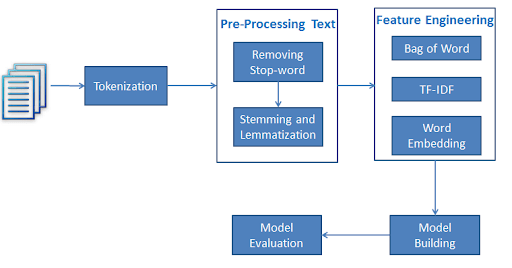

We will perform text classification using Multi-Nomial Naive Bayes Classification using `scikit-learn`.

In the model the building part, we will use "Sentiment Analysis of Movie, Reviews" dataset available on [Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data). The dataset is a tab-separated file. Dataset has four columns `PhraseId`, `SentenceId`, `Phrase`, and `Sentiment`. The data has 5 sentiment labels:
    
1.   0 - negative
2.   1 - somewhat negative
3.   2 - neutral
4.   3 - somewhat positive
5.   4 - positive

In [ ]:
# Download dataset from
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10025/32092/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1671937205&Signature=IrPRu4rWfLuUmzzg8Eb8s304dThrWcrNeDkey8qeorNEzTkulq9VSwLLptzU1jV5b6flFxBXhH9%2Bm7%2FWUPgFKMrf6l4jfizGM6viFY7I7Ljk0yT9wtA8bio0OgI9P2%2BqP1urA9Q8XKV4zgWXXAGK%2FsUlj1wx6ojkNqUwDJZmNMBoFTEyvs%2FjS%2B1wV6qbarADI4cQrBdhxU29mz%2FHJz6kTyhjxXJAZcXfabIRLCM7e7ycMAIXQaVXSCIvfFRcMN8ACW4rD24u%2B%2B4S6C0VeHkhM%2BSla%2BE5G5jitF2ZQAz3L3YaUWJDNEIkGcdJGuKJdXGNJdQ64sPgtmGhPaeMwhuf%2Fg%3D%3D&response-content-disposition=attachment%3B+filename%3Dsentiment-analysis-on-movie-reviews.zip" -O "sentiment-analysis-on-movie-reviews.zip"

In [ ]:
# Unzip them
!unzip "sentiment-analysis-on-movie-reviews.zip"
!unzip "test.tsv.zip"
!unzip "test.tsv.zip"

In [ ]:
# Import pandas
import pandas as pd

# Load dataset into Pandas dataframe
data=pd.read_csv('train.tsv', sep='\t')
data.head()

In [ ]:
data.tail()

In [ ]:
# Inspect data structure
data.info()

In [ ]:
# View total count for each sentiment
data.Sentiment.value_counts()

In [ ]:
# Visualise total count for each sentiment
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. We need to convert these text into some numbers or vectors of numbers.

Bag-of-words model (BoW) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

We can generate document term matrix by using `scikit-learn`'s `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

# Vectorize phrase from the dataset
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
text_counts

### Split train and test set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=0)

### Model Building and Evaluation

First, import the `MultinomialNB` module and create a Multinomial Naive Bayes classifier object using `MultinomialNB()` function.

Then, fit the model on a train set using `fit()` and perform prediction on the test set using `predict()`.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

Well, we got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

### Feature Generation using TF-IDF

In Term Frequency (TF), we just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

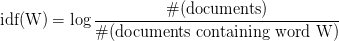

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=1)

### Model Building and Evaluation (TF-IDF)

We will repeat the similar model building and evaluation we did for BoW method.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=1)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
# Train a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

print("Decision Treee Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1e-1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

print("SVM Accuracy:",metrics.accuracy_score(y_test, svm_predictions))

### Random Forest

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

Since it uses multiple decision trees, the time complexity of random forest is $O(\log n)$ whilst training takes $O(tu_{n}\log n)$, where $t$ is the number of trees and $u$ is the number of features considered for splitting.

In [ ]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))